In [1]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv


--2022-09-22 11:50:10--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M   674KB/s    in 13s     

2022-09-22 11:50:25 (248 KB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

np.random.seed(1)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
df_ = pd.read_csv("AirlineTweets.csv")

In [4]:
df_

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
df = df_[['airline_sentiment', 'text']].copy()

In [6]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


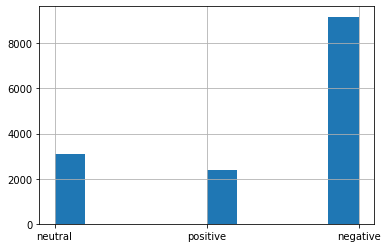

In [7]:
df['airline_sentiment'].hist()

In [8]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [9]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [10]:
df_train, df_test = train_test_split(df)

In [11]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [12]:
vectorizer = TfidfVectorizer(max_features = 2000)

In [13]:
X_train = vectorizer.fit_transform(df_train['text'])

In [14]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157852 stored elements in Compressed Sparse Row format>

In [15]:
X_test = vectorizer.transform(df_test['text'])

In [16]:
X_test

<3660x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 52230 stored elements in Compressed Sparse Row format>

In [17]:
Y_train = df_train['target']
Y_test = df_test['target']

In [18]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8548269581056467
Test acc: 0.7991803278688525


In [19]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test  AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9430961456387204
Test  AUC: 0.8953996502217668


In [20]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [21]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.96486133, 0.00813126, 0.02700741],
       [0.19966063, 0.69966063, 0.10067873],
       [0.30150538, 0.0516129 , 0.64688172]])

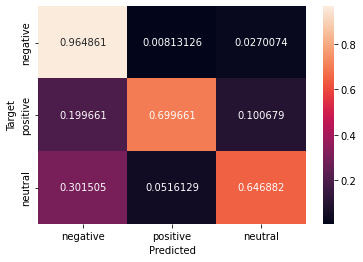

In [22]:
#plotting confusion matrix
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

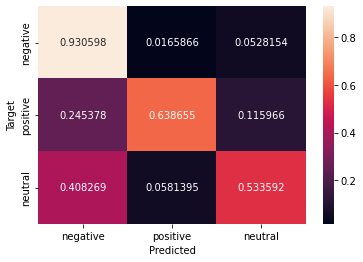

In [23]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

Binary Labels & Model Interpretation

In [24]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [25]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [26]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [27]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [28]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [29]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [30]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [32]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [33]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']



In [34]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:"), model.score(X_test, Y_test)

Train acc: 0.9300982091276718
Test acc:


(None, 0.9147609147609148)

In [35]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test  AUC:", roc_auc_score(Y_test, Pr_test))

Train AUC: 0.9790315809115082
Test  AUC: 0.9533010061292087


In [36]:
model.coef_

array([[-0.25739278, -0.13377981, -0.34118084, ...,  0.49951607,
         0.00725632, -0.61652739]])

(array([  2.,   0.,   2.,   3.,   2.,  12.,  25.,  60., 183., 776., 550.,
        227.,  86.,  44.,  11.,   2.,   2.,   4.,   2.,   1.,   3.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.23787117, -3.82467728, -3.41148339, -2.9982895 , -2.58509561,
        -2.17190172, -1.75870783, -1.34551394, -0.93232006, -0.51912617,
        -0.10593228,  0.30726161,  0.7204555 ,  1.13364939,  1.54684328,
         1.96003717,  2.37323105,  2.78642494,  3.19961883,  3.61281272,
         4.02600661,  4.4392005 ,  4.85239439,  5.26558828,  5.67878216,
         6.09197605,  6.50516994,  6.91836383,  7.33155772,  7.74475161,
         8.1579455 ]),
 <a list of 30 Patch objects>)

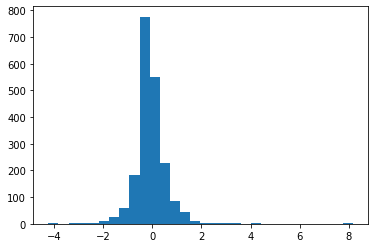

In [38]:
plt.hist(model.coef_[0], bins=30)

In [39]:
word_index_map = vectorizer.vocabulary_
word_index_map


{'united': 1849,
 'change': 338,
 'made': 1087,
 'in': 938,
 'just': 989,
 'over': 1271,
 'hours': 903,
 'for': 745,
 'something': 1619,
 'that': 1737,
 'should': 1575,
 'have': 851,
 'taken': 1711,
 'online': 1246,
 'am': 139,
 'not': 1213,
 'loved': 1076,
 'the': 1739,
 'agent': 112,
 'though': 1755,
 'door': 568,
 'to': 1775,
 'half': 826,
 'into': 964,
 'plane': 1334,
 'seat': 1535,
 'be': 235,
 'forced': 746,
 'always': 138,
 'sit': 1591,
 'here': 873,
 'americanair': 143,
 '11': 6,
 'out': 1266,
 'of': 1227,
 'delayed': 497,
 'flights': 728,
 'you': 1993,
 'suck': 1682,
 'and': 148,
 'getting': 793,
 'worse': 1971,
 'fair': 670,
 'usairways': 1868,
 'stuck': 1677,
 'need': 1191,
 'reflight': 1438,
 'booking': 270,
 'problems': 1380,
 'next': 1199,
 'flight': 717,
 'possibly': 1359,
 'dm': 554,
 'more': 1166,
 'info': 951,
 'southwestair': 1630,
 'got': 810,
 'help': 867,
 'from': 765,
 'nice': 1201,
 'lady': 1007,
 'on': 1241,
 'phone': 1319,
 'thank': 1734,
 'refund': 1439,
 'vo

In [40]:
#let's look at the weights for each word
threshold=2

print("Most positive words:")
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight > threshold:
    print(word, weight)

Most positive words:
southwestair 2.860075665410592
thank 8.070503978141074
great 5.208733896945712
best 3.636864282496104
virginamerica 3.2284047965850027
thx 2.8083250880776274
jetblue 3.0216163020850937
good 3.2615369142927646
thanks 8.157945495897117
love 4.4051527111816045
appreciate 2.929926451281921
awesome 4.054714104323095
cool 2.0881519342820365
kudos 2.614183631559971
amazing 4.19464795569218
worries 2.711651303754143
wonderful 2.1204124374909696


In [41]:
#let's look at the weights for each word
threshold=2

print("Most negative words:")
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight < threshold:
    print(word, weight)

Most negative words:
united -0.4265307205158003
change -0.40464655920406306
made 1.609758899703559
in 0.307629275703451
just 1.2816696967601569
over -1.0871954161845934
hours -3.18012017287479
for -0.015016157184297513
something 0.09487185878582013
that -0.7285549205397274
should -1.0551396275416194
have -1.1315822728084668
taken -0.4083415318677602
online -1.2188738114152264
am -0.10951599947075398
not -4.237871165044622
loved 1.1863817159727084
the 0.506382534675132
agent 0.10640607378366838
though 0.9105294415792399
door -0.4746709470231944
to -0.5519629143498374
half -1.0552526936115045
into 0.2835365768804087
plane -0.8331423338780521
seat -0.7843475444274651
be -0.46470166429325177
forced -0.6642841191528451
always 1.4576849731083985
sit -0.9646472575079044
here -0.9478770953199345
americanair -0.4339325250970127
11 -0.8154409235209775
out 0.029916626420888444
of -0.7351078927705288
delayed -2.704527096102092
flights -0.24150136985523243
you -0.07744442141390091
suck -1.159305321